In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

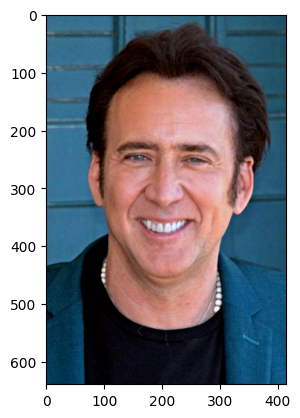

In [23]:

                                         
imagem = cv2.imread('files/nic1.jpg')
imagem=cv2.cvtColor(imagem,cv2.COLOR_BGR2RGB)
plt.imshow(imagem)




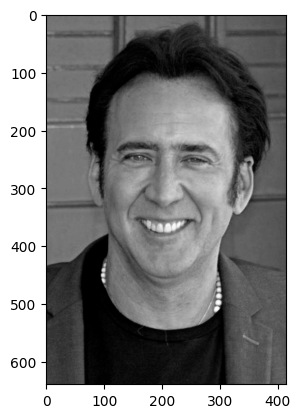

In [24]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem_gray,cmap='gray')

In [31]:
classificador_face=cv2.CascadeClassifier(r'C:\Users\alber\Documents\Projetos - Dados\Computer Vision\Notebooks\files\classificadores\haarcascade_frontalface_default.xml')
faces =classificador_face.detectMultiScale(imagem_gray, 1.3, 5)





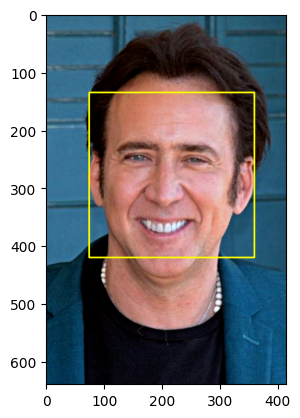

In [33]:
# Lista de faces. Caso não seja identificada será retornado
if faces is None:
    cv2.putText(imagem, "Rosto ausente", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 6)
# Desenhando retângulos nos rostos identificados
else:
    for (x,y,w,h ) in faces:
        cv2.rectangle(imagem, (x,y), (x+w,y+h) , (255,255,0),2)

plt.imshow(imagem)


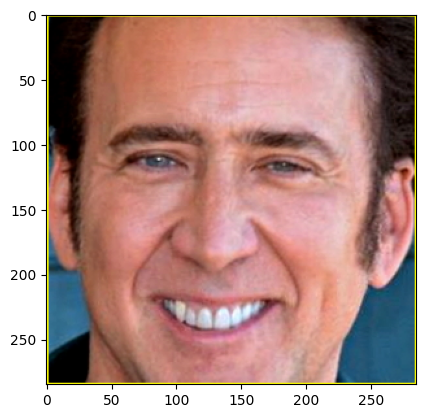

In [42]:
#Cortando Imagem
plt.imshow(imagem[y:y+h,x:x+w])

In [50]:
FACE_COMPLETA = list(range(0, 68))
SOMBRANCELHA_DIREITA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36, 42))
OLHO_ESQUERDO = list(range(42, 48))
NARIZ = list(range(27, 35))
LABIO = list(range(48, 61))
LABIO_EXTERIOR = list(range(48, 61))
LABIO_INTERIOR = list(range(60, 68))
MANDIBULA = list(range(0, 17))

In [54]:
def extrair_olho(shape, eye_indices):
    points = map(lambda i: shape.part(i), eye_indices)
    return list(points)

def extrair_olho_centro(shape, eye_indices):
    points = extrair_olho(shape, eye_indices)
    xs = map(lambda p: p.x, points)
    ys = map(lambda p: p.y, points)
    return sum(xs) // 6, sum(ys) // 6

def extrair_olho_centro_esquerdo(shape):
    return extrair_olho_centro(shape, OLHO_ESQUERDO)

def extrair_olho_centro_direito(shape):
    return extrair_olho_centro(shape, OLHO_DIREITO)

def angulo_entre_pontos(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    tan = (y2 - y1) / (x2 - x1)
    return np.degrees(np.arctan(tan))

def get_rotation_matrix(p1, p2):
    angle = angulo_entre_pontos(p1, p2)
    x1, y1 = p1
    x2, y2 = p2
    xc = (x1 + x2) // 2
    yc = (y1 + y2) // 2
    M = cv2.getRotationMatrix2D((xc, yc), angle, 1)
    return M

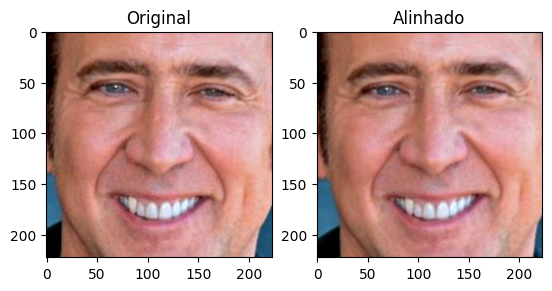

In [55]:
def align_face(image_path, tamanho=None, return_face=False):
  classificador_68_path = r"C:\Users\alber\Documents\Projetos - Dados\Computer Vision\Notebooks\files\classificadores\shape_predictor_68_face_landmarks.dat"
  detector_face_dlib = dlib.get_frontal_face_detector()
  classificador_dlib_68 = dlib.shape_predictor(classificador_68_path)

  imagem = cv2.imread(image_path)
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

  height, width = imagem.shape[:2]
  dets = detector_face_dlib(imagem, 1)

  if len(dets) == 0:
    return None
  
  for i, det in enumerate(dets):

      x = det.left()
      y = det.top()
      w = det.right() - x
      h = det.bottom() - y

      if x < 0: x = 0
      if y < 0: y = 0

      roi = imagem[y:y+h, x:x+w]

      shape = classificador_dlib_68(imagem, det)
      left_eye = extrair_olho_centro_esquerdo(shape)
      right_eye = extrair_olho_centro_direito(shape)

      M = get_rotation_matrix(left_eye, right_eye)

      if tamanho:
        width = tamanho[0]
        height = tamanho[1]
        
      rotated = cv2.warpAffine(imagem, M, (width, height))

      cropped = rotated[y:y+h, x:x+w]

  if return_face:
    return cropped

  plt.subplot(1,2,1)
  plt.title("Original")
  plt.imshow(roi)

  plt.subplot(1,2,2)
  plt.title("Alinhado")
  plt.imshow(cropped)

  plt.show()


align_face('files/nic1.jpg')